In [67]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt


#filename = 'df_imputed_scaled_OHE.pkl'
filename = 'df_OHE_cat_continous_num_v1.pkl'
df = pd.read_pickle(filename)

X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])



In [25]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.ensemble import RandomForestClassifier #Random Forest

# The "accuracy" scoring is proportional to the number of correct classifications
kfold = StratifiedKFold(n_splits=10, random_state=1) # k=10, split the data into 10 equal parts
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=kfold,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

discarded_features = [x for x in np.asarray(X.columns) if x not in X.columns[rfecv.support_]]

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])
print('Discarded  features :', discarded_features)
print('Original features :', X.columns)

Optimal number of features : 10
Best features : Index(['age', 'sex_0', 'cp_2', 'cp_4', 'trestbps', 'chol', 'restecg_0',
       'thalach', 'exang_0', 'oldpeak'],
      dtype='object')
Discarded  features : ['sex_1', 'cp_1', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'slope_3']
Original features : Index(['age', 'sex_0', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'trestbps',
       'chol', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2',
       'thalach', 'exang_0', 'exang_1', 'oldpeak', 'slope_1', 'slope_2',
       'slope_3'],
      dtype='object')


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 22 columns):
age             920 non-null float64
sex_0           920 non-null float64
sex_1           920 non-null float64
cp_1            920 non-null float64
cp_2            920 non-null float64
cp_3            920 non-null float64
cp_4            920 non-null float64
trestbps        920 non-null float64
chol            920 non-null float64
fbs_0           920 non-null float64
fbs_1           920 non-null float64
restecg_0       920 non-null float64
restecg_1       920 non-null float64
restecg_2       920 non-null float64
thalach         920 non-null float64
exang_0         920 non-null float64
exang_1         920 non-null float64
oldpeak         920 non-null float64
slope_1         920 non-null float64
slope_2         920 non-null float64
slope_3         920 non-null float64
heartdisease    920 non-null int64
dtypes: float64(21), int64(1)
memory usage: 158.2 KB


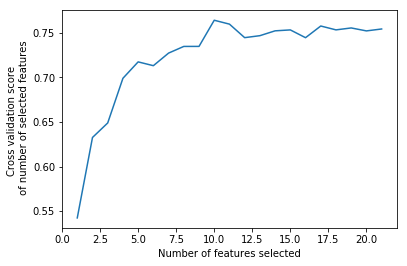

array([0.12530229, 0.04574912, 0.05404335, 0.12837153, 0.09645708,
       0.13959807, 0.01722028, 0.15438141, 0.09324835, 0.14562851])


In [26]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
pprint(rfecv.estimator_.feature_importances_ )

Optimal number of features : 17
Best features : Index(['age', 'sex_0', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'chol',
       'fbs_1', 'restecg_1', 'restecg_2', 'thalach', 'exang_0', 'exang_1',
       'oldpeak', 'slope_1', 'slope_2'],
      dtype='object')
Discarded  features : ['trestbps', 'fbs_0', 'restecg_0', 'slope_3']
Original features : Index(['age', 'sex_0', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'trestbps',
       'chol', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2',
       'thalach', 'exang_0', 'exang_1', 'oldpeak', 'slope_1', 'slope_2',
       'slope_3'],
      dtype='object')


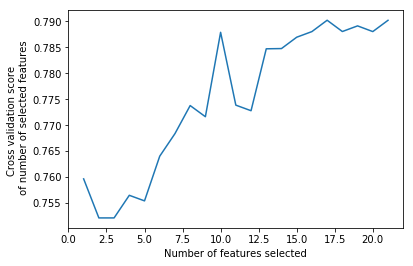

In [28]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.ensemble import RandomForestClassifier #Random Forest

# The "accuracy" scoring is proportional to the number of correct classifications
#kfold = StratifiedKFold(n_splits=10, random_state=1) # k=10, split the data into 10 equal parts

model_Linear_SVM=svm.SVC(kernel='linear', probability=True)
rfecv = RFECV(estimator=model_Linear_SVM, step=1, cv=kfold,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

discarded_features = [x for x in np.asarray(X.columns) if x not in X.columns[rfecv.support_]]

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])
print('Discarded  features :', discarded_features)
print('Original features :', X.columns)




plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [68]:
discarded_features = [x for x in np.asarray(X.columns) if x not in final_best_features] 
print('Discarded  features :', discarded_features)

Discarded  features : ['age', 'cp_1', 'cp_3', 'trestbps', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'slope_3']


In [62]:
drop_list = ['age']

X_new = X.drop(drop_list, axis=1)


In [63]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
sex_0        920 non-null float64
sex_1        920 non-null float64
cp_2         920 non-null float64
cp_3         920 non-null float64
cp_4         920 non-null float64
chol         920 non-null float64
fbs_0        920 non-null float64
restecg_1    920 non-null float64
thalach      920 non-null float64
exang_0      920 non-null float64
exang_1      920 non-null float64
oldpeak      920 non-null float64
slope_2      920 non-null float64
dtypes: float64(13)
memory usage: 93.5 KB


Optimal number of features : 10
Best features : Index(['sex_0', 'sex_1', 'cp_2', 'cp_4', 'chol', 'fbs_0', 'thalach', 'exang_0',
       'exang_1', 'oldpeak'],
      dtype='object')
Discarded  features : ['cp_3', 'restecg_1', 'slope_2']
Original features : Index(['sex_0', 'sex_1', 'cp_2', 'cp_3', 'cp_4', 'chol', 'fbs_0', 'restecg_1',
       'thalach', 'exang_0', 'exang_1', 'oldpeak', 'slope_2'],
      dtype='object')


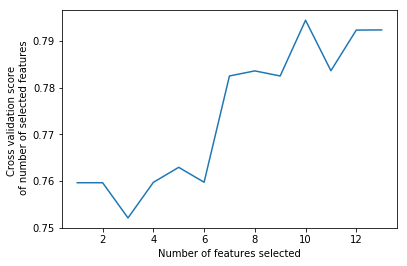

In [64]:
X = X_new
rfecv = RFECV(estimator=model_Linear_SVM, step=1, cv=kfold,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

discarded_features = [x for x in np.asarray(X.columns) if x not in X.columns[rfecv.support_]]

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])
print('Discarded  features :', discarded_features)
print('Original features :', X.columns)




plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [66]:
coefs = np.absolute(rfecv.estimator_.coef_)
print(coefs)
print('min_coef', np.min(coefs))

final_best_features = X.columns[rfecv.support_]



[[0.48702703 0.48702703 0.51208736 1.06801881 0.23541662 0.29931388
  0.35984394 0.34810628 0.34810628 0.42735001]]
min_coef 0.23541662227043486


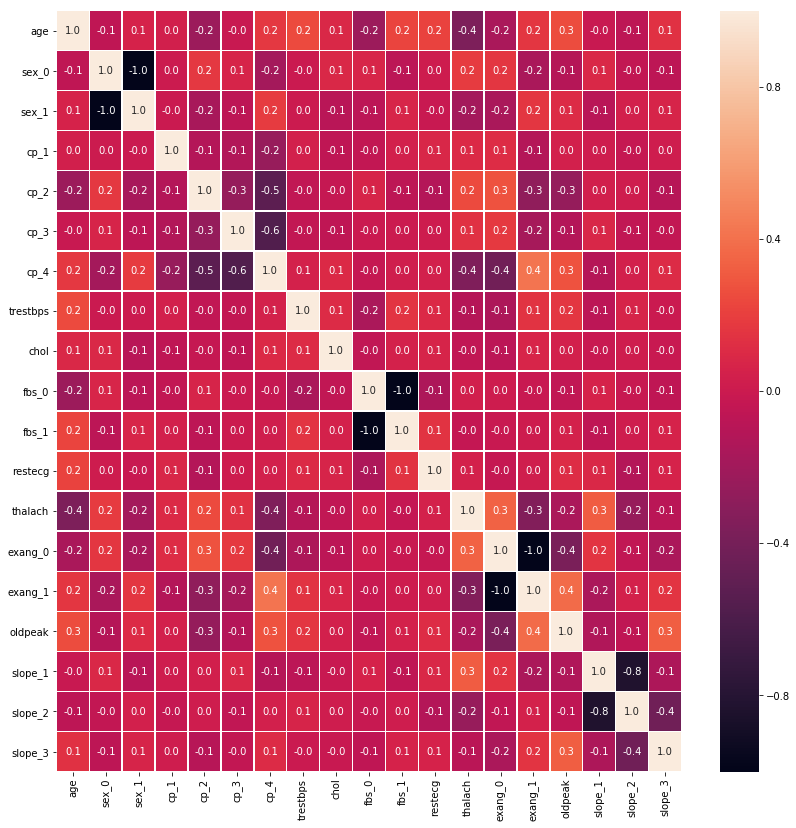

In [14]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

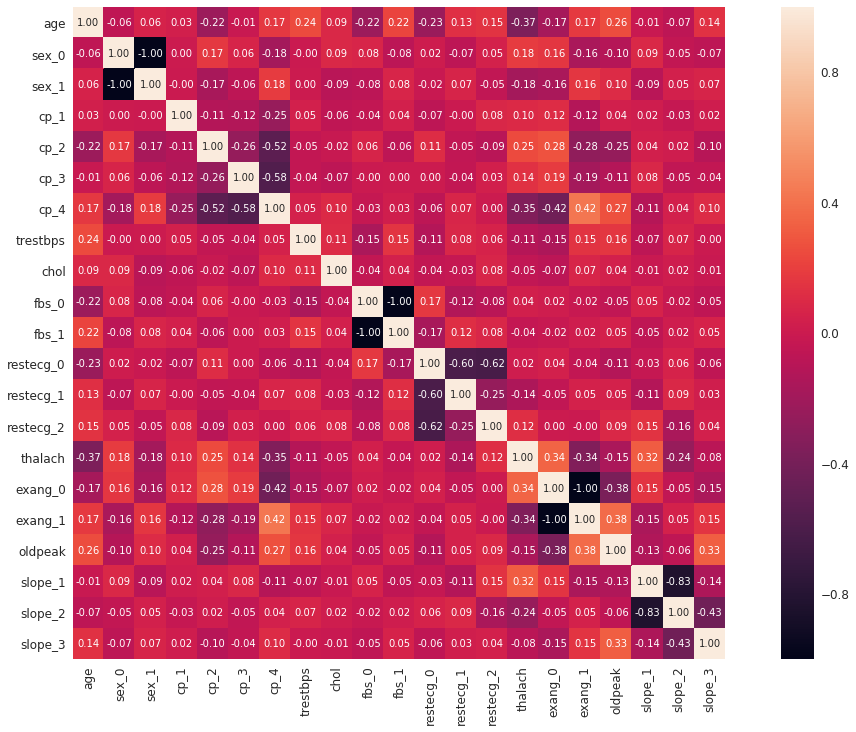

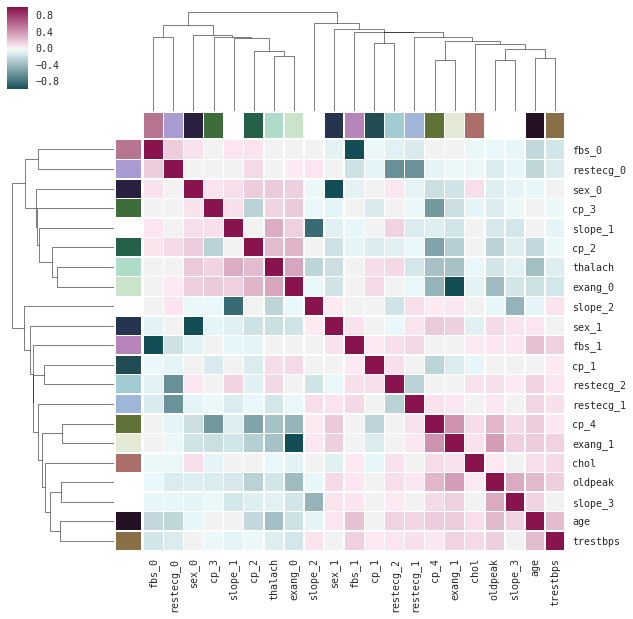

In [30]:
from sklearn.cluster import FeatureAgglomeration
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt

#filename = 'df_imputed_tot.pkl'
#df_total = pd.read_pickle(filename)

#filename = 'df_imputed_tot_OHE.pkl'
#df_total = pd.read_pickle(filename)


df_total = df

#filename = 'TotalDataBase.pkl'
#df_total = pd.read_pickle(filename)

#df_total = df_total.drop_duplicates(keep='first')


# Heatmap of feature correlations

#plt.figure(figsize=(10, 8))
correlations = df_total.corr()
#sns.heatmap(correlations, vmax=0.8, square=True)
#plt.show()






def extract_numerical_features(df):
    df = df.copy()
    # Identify numerical columns which are of type object
    numerical_features = pd.Series(data=False, index=df.columns, dtype=bool)

    for feature in df.columns:
        if any(tuple(df[feature].apply(lambda x: type(x)) == int)) or \
                any(tuple(df[feature].apply(lambda x: type(x)) == float)) & \
                (not any(tuple(df[feature].apply(lambda x: type(x)) == str))):
            numerical_features[feature] = 1
    return numerical_features[numerical_features == 1].index

    # Zoom of heatmap with coefficients


'''
plt.figure(figsize=(22, 14))
correlations = df_total[extract_numerical_features(df_total)].corr()
sns.heatmap(correlations, vmax=0.8, square=True)
plt.show()
'''

'''df_sin_target = pd.DataFrame(
    data=df_total[df_total.columns[
        df_total.columns != 'heartdisease']].values, columns=df_total.columns[
        df_total.columns != 'heartdisease'])'''
num_features = extract_numerical_features(df_total)
#num_features = extract_numerical_features(df_sin_target)


df_aglo = pd.DataFrame(data=df_total.values, columns=df_total.columns)


df_total = df_aglo[X.columns]
#df_total = df_total[num_features]
plt.figure(figsize=(20, 12))
top_features = 10

correlation_coeff = np.corrcoef(df_total.astype(float).values.T)
sns.set(font_scale=1.20)
coeff_heatmap = sns.heatmap(correlation_coeff, annot=True, cbar=True,
                            square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=df_total.columns, xticklabels=df_total.columns)
plt.show()



number_of_clusters=int(df_total.shape[1]/1.2)
# Create Dendrogram
agglomerated_features = FeatureAgglomeration(n_clusters=number_of_clusters)
used_networks = np.arange(0, number_of_clusters, dtype=int)
# used_networks = np.unique(agglomerated_features.labels_)

# In our case all columns are clustered, which means used_columns is true in every element
# used_columns = (df.columns.get_level_values(None)
                # .astype(int)
                # .isin(used_networks))
# used_columns = (agglomerated_feature_labels.astype(int).isin(used_networks))
# df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, df_total.columns), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_total.columns.get_level_values(None)
network_colors = pd.Series(networks, index=df_total.columns).map(network_lut)
sns.set(font="monospace")
# Create custom colormap
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
cg = sns.clustermap(df_total.astype(float).corr(), cmap=cmap, linewidths=.5,
                    row_colors=network_colors, col_colors=network_colors)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

In [37]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 22 columns):
age             920 non-null float64
sex_0           920 non-null float64
sex_1           920 non-null float64
cp_1            920 non-null float64
cp_2            920 non-null float64
cp_3            920 non-null float64
cp_4            920 non-null float64
trestbps        920 non-null float64
chol            920 non-null float64
fbs_0           920 non-null float64
fbs_1           920 non-null float64
restecg_0       920 non-null float64
restecg_1       920 non-null float64
restecg_2       920 non-null float64
thalach         920 non-null float64
exang_0         920 non-null float64
exang_1         920 non-null float64
oldpeak         920 non-null float64
slope_1         920 non-null float64
slope_2         920 non-null float64
slope_3         920 non-null float64
heartdisease    920 non-null int64
dtypes: float64(21), int64(1)
memory usage: 158.2 KB


In [ ]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(7, 3))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Text(0,0.5,'explained_variance_ratio_')

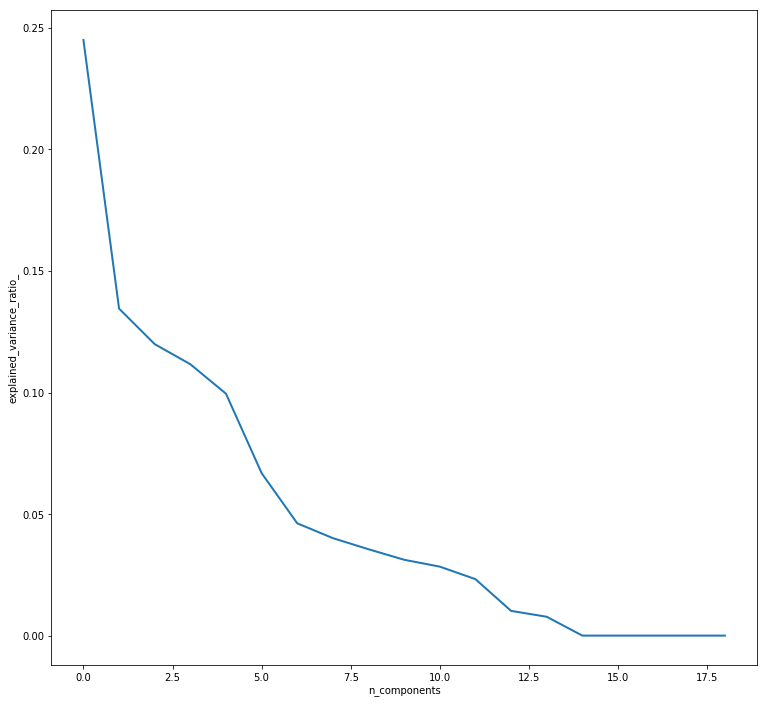

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

[0.10298916 0.02521747 0.03877733 0.01283379 0.07964147 0.03391228
 0.10024411 0.09613573 0.10332378 0.01531126 0.01401858 0.01381163
 0.01741019 0.01216464 0.1030532  0.03714504 0.05966985 0.08725423
 0.02363222 0.01664081 0.00681321]
Feature ranking:
1. feature 8 (0.103324)
2. feature 14 (0.103053)
3. feature 0 (0.102989)
4. feature 6 (0.100244)
5. feature 7 (0.096136)
6. feature 17 (0.087254)
7. feature 4 (0.079641)
8. feature 16 (0.059670)
9. feature 2 (0.038777)
10. feature 15 (0.037145)
11. feature 5 (0.033912)
12. feature 1 (0.025217)
13. feature 18 (0.023632)
14. feature 12 (0.017410)
15. feature 19 (0.016641)
16. feature 9 (0.015311)
17. feature 10 (0.014019)
18. feature 11 (0.013812)
19. feature 3 (0.012834)
20. feature 13 (0.012165)
21. feature 20 (0.006813)


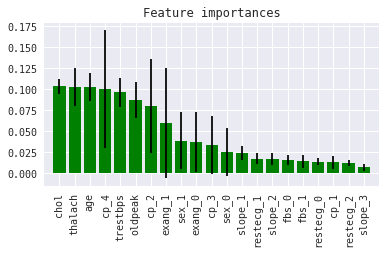

In [75]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(6, 3))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

[0.1116149  0.0390903  0.0226081  0.00778991 0.04617513 0.01668848
 0.11963091 0.0839845  0.11978587 0.01634067 0.00885509 0.01352785
 0.01562569 0.01308251 0.12247105 0.08506326 0.01092121 0.11535897
 0.01463263 0.0130724  0.00368055]
Feature ranking:
1. feature 14 (0.122471)
2. feature 8 (0.119786)
3. feature 6 (0.119631)
4. feature 17 (0.115359)
5. feature 0 (0.111615)
6. feature 15 (0.085063)
7. feature 7 (0.083985)
8. feature 4 (0.046175)
9. feature 1 (0.039090)
10. feature 2 (0.022608)
11. feature 5 (0.016688)
12. feature 9 (0.016341)
13. feature 12 (0.015626)
14. feature 18 (0.014633)
15. feature 11 (0.013528)
16. feature 13 (0.013083)
17. feature 19 (0.013072)
18. feature 16 (0.010921)
19. feature 10 (0.008855)
20. feature 3 (0.007790)
21. feature 20 (0.003681)


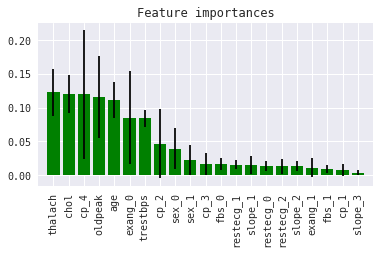

In [74]:
# fit an Extra Trees model to the data
import xgboost as xg
model = clf_rf_4
#model = xg.XGBClassifier(learning_rate =0.1, gamma=0, objective= 'binary:logistic',nthread=4, scale_pos_weight=1, seed=27, n_estimators = 50,max_depth = 9,)
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(6, 3))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [73]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
age             920 non-null float64
sex_0           920 non-null float64
sex_1           920 non-null float64
cp_2            920 non-null float64
cp_4            920 non-null float64
trestbps        920 non-null float64
chol            920 non-null float64
thalach         920 non-null float64
exang_0         920 non-null float64
exang_1         920 non-null float64
oldpeak         920 non-null float64
heartdisease    920 non-null int64
dtypes: float64(11), int64(1)
memory usage: 86.3 KB


In [71]:
drop_list = ['slope_3', 'slope_2', 'slope_1', 'fbs_0','fbs_1','cp_1','cp_3', 'restecg_0', 'restecg_1', 'restecg_2']
df_new = df.drop(drop_list, axis=1)
filename = 'df_imputed_scaled_OHE_reducedv1.pkl'
df_new.to_pickle(filename)

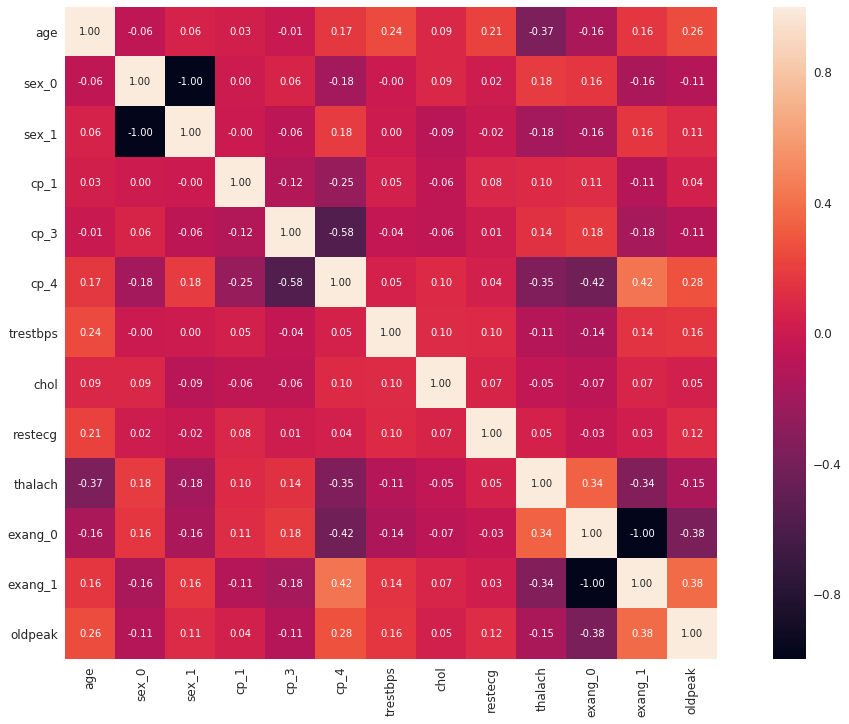

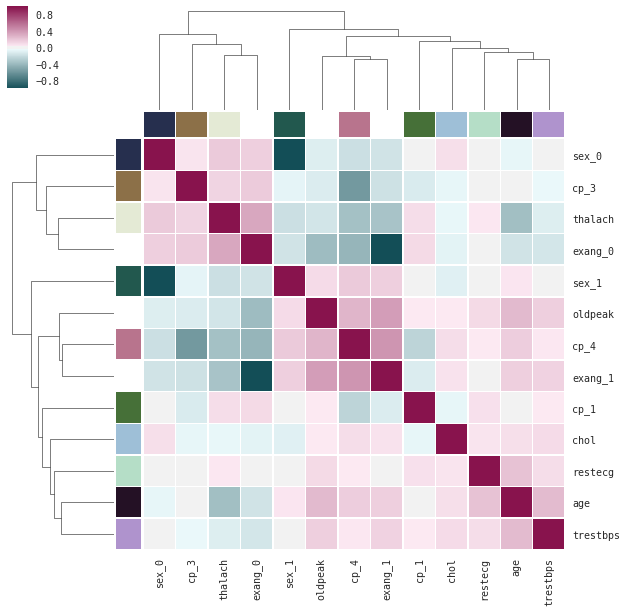

In [38]:
from sklearn.cluster import FeatureAgglomeration
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt

#filename = 'df_imputed_tot.pkl'
#df_total = pd.read_pickle(filename)

#filename = 'df_imputed_tot_OHE.pkl'
#df_total = pd.read_pickle(filename)



df_total = df_new
X = df_new[df_new.columns[:-1]]
y = pd.Series(df_new['heartdisease'])

#filename = 'TotalDataBase.pkl'
#df_total = pd.read_pickle(filename)

#df_total = df_total.drop_duplicates(keep='first')


# Heatmap of feature correlations

#plt.figure(figsize=(10, 8))
correlations = df_total.corr()
#sns.heatmap(correlations, vmax=0.8, square=True)
#plt.show()






def extract_numerical_features(df):
    df = df.copy()
    # Identify numerical columns which are of type object
    numerical_features = pd.Series(data=False, index=df.columns, dtype=bool)

    for feature in df.columns:
        if any(tuple(df[feature].apply(lambda x: type(x)) == int)) or \
                any(tuple(df[feature].apply(lambda x: type(x)) == float)) & \
                (not any(tuple(df[feature].apply(lambda x: type(x)) == str))):
            numerical_features[feature] = 1
    return numerical_features[numerical_features == 1].index

    # Zoom of heatmap with coefficients


'''
plt.figure(figsize=(22, 14))
correlations = df_total[extract_numerical_features(df_total)].corr()
sns.heatmap(correlations, vmax=0.8, square=True)
plt.show()
'''

'''df_sin_target = pd.DataFrame(
    data=df_total[df_total.columns[
        df_total.columns != 'heartdisease']].values, columns=df_total.columns[
        df_total.columns != 'heartdisease'])'''
num_features = extract_numerical_features(df_total)
#num_features = extract_numerical_features(df_sin_target)


df_aglo = pd.DataFrame(data=df_total.values, columns=df_total.columns)


df_total = df_aglo[X.columns]
#df_total = df_total[num_features]
plt.figure(figsize=(20, 12))
top_features = 10

correlation_coeff = np.corrcoef(df_total.astype(float).values.T)
sns.set(font_scale=1.20)
coeff_heatmap = sns.heatmap(correlation_coeff, annot=True, cbar=True,
                            square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=df_total.columns, xticklabels=df_total.columns)
plt.show()



number_of_clusters=int(df_total.shape[1]/1.2)
# Create Dendrogram
agglomerated_features = FeatureAgglomeration(n_clusters=number_of_clusters)
used_networks = np.arange(0, number_of_clusters, dtype=int)
# used_networks = np.unique(agglomerated_features.labels_)

# In our case all columns are clustered, which means used_columns is true in every element
# used_columns = (df.columns.get_level_values(None)
                # .astype(int)
                # .isin(used_networks))
# used_columns = (agglomerated_feature_labels.astype(int).isin(used_networks))
# df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, df_total.columns), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_total.columns.get_level_values(None)
network_colors = pd.Series(networks, index=df_total.columns).map(network_lut)
sns.set(font="monospace")
# Create custom colormap
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
cg = sns.clustermap(df_total.astype(float).corr(), cmap=cmap, linewidths=.5,
                    row_colors=network_colors, col_colors=network_colors)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()